# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [2]:
# Your code here! :)
data = pd.read_csv('GermanCredit.csv.zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [3]:
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [4]:
le = preprocessing.LabelEncoder()
le.fit(["Good", "Bad"])

y = le.transform(data['Class']) #converting to numeric values because dtreeviz only accepts numeric input
X = data.drop(columns=['Class'])

In [5]:
# Split the dataset 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.43      0.43        88
           1       0.76      0.75      0.76       212

    accuracy                           0.66       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.66      0.66      0.66       300



In [6]:
clf.score(x_test, y_test)

0.66

In [7]:
# Grid search 
criterion=['gini','entropy']
max_depth=[3,4,5,6,7,8,9,10,12,15,20]
min_samples_leaf=[5, 10, 20, 50, 100]
param_grid = dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=50), 
                           param_grid=param_grid, 
                           cv=4)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [8]:
best_tree = grid_search.best_estimator_
print(classification_report(y_test, best_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.58      0.20      0.30        88
           1       0.74      0.94      0.83       212

    accuracy                           0.72       300
   macro avg       0.66      0.57      0.56       300
weighted avg       0.69      0.72      0.67       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

/Users/samyraman/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


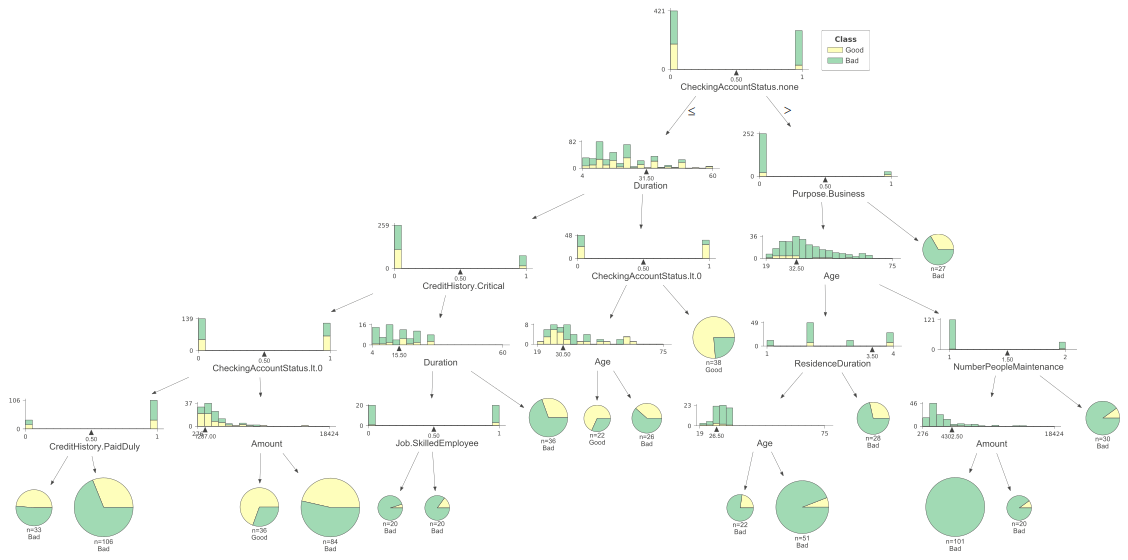

In [9]:
# Your code here! :)
from dtreeviz.trees import *

viz = dtreeviz(best_tree, 
               x_train, 
               y_train,
               target_name='Class',
               feature_names=X.columns,
               class_names=['Good', 'Bad']
              )
viz


## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Your code here! :)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=50), 
                           param_grid=param_grid, 
                           cv=4)
grid_search_rf.fit(x_train, y_train)
print(grid_search_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5}


In [12]:
best_forest = grid_search_rf.best_estimator_
print(classification_report(y_test, best_forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.67      0.27      0.39        88
           1       0.76      0.94      0.84       212

    accuracy                           0.75       300
   macro avg       0.71      0.61      0.61       300
weighted avg       0.73      0.75      0.71       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

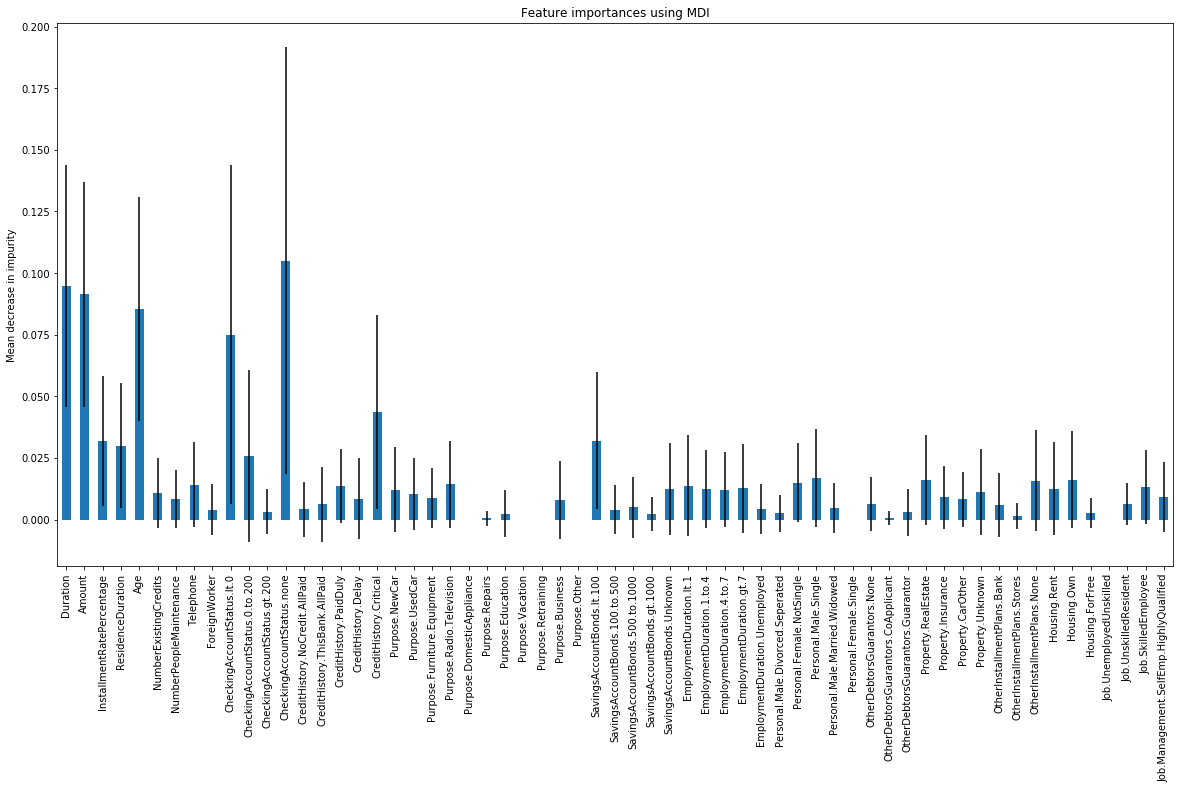

In [13]:
# Your code here
import numpy as np
importances = best_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.gcf().set_size_inches(20, 10)

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

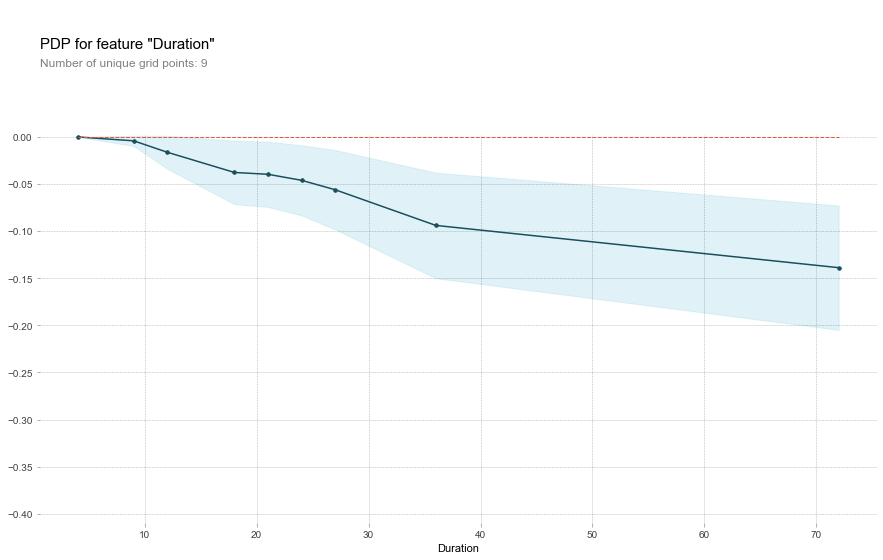

In [14]:
# Your code here!
from pdpbox import pdp

pdp_duration = pdp.pdp_isolate(
    model=best_forest, dataset=data, model_features=X.columns, feature='Duration'
)
fig, axes = pdp.pdp_plot(pdp_duration, 'Duration')


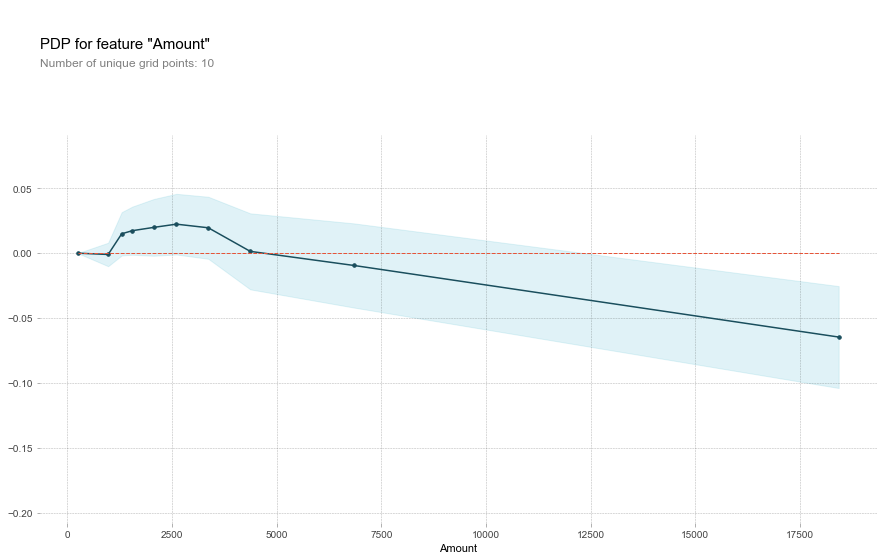

In [15]:
pdp_amount = pdp.pdp_isolate(
    model=best_forest, dataset=data, model_features=X.columns, feature='Amount'
)
fig, axes = pdp.pdp_plot(pdp_amount, 'Amount')

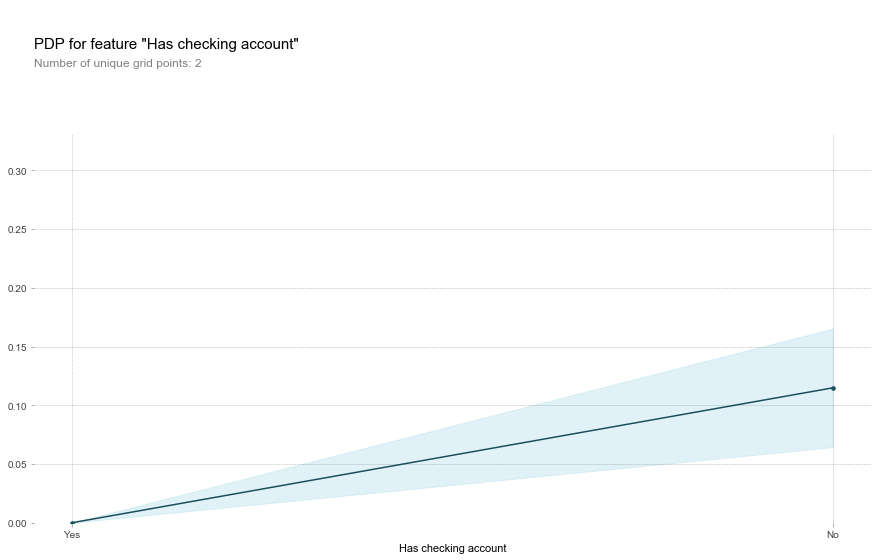

In [16]:
pdp_checking = pdp.pdp_isolate(
    model=best_forest, dataset=data, model_features=X.columns, feature='CheckingAccountStatus.none'
)
fig, axes = pdp.pdp_plot(pdp_checking, 'Has checking account')
_ = axes['pdp_ax'].set_xticklabels(['Yes', 'No'])

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [17]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()
xgbc.fit(x_train,y_train)

y_pred = xgbc.predict(x_test)
print(classification_report(y_test, y_pred))

[11:10:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        88
           1       0.77      0.86      0.81       212

    accuracy                           0.72       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300



In [18]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()

clf.fit(
    x_train, y_train,
    cat_features=[0,1]
)

# Get predicted classes
preds_class = clf.predict(x_test)
# Get predicted probabilities for each class
preds_proba = clf.predict_proba(x_test)

Learning rate set to 0.008847
0:	learn: 0.6894287	total: 63.6ms	remaining: 1m 3s
1:	learn: 0.6856892	total: 67.6ms	remaining: 33.7s
2:	learn: 0.6819351	total: 70.2ms	remaining: 23.3s
3:	learn: 0.6778541	total: 73ms	remaining: 18.2s
4:	learn: 0.6745500	total: 75.5ms	remaining: 15s
5:	learn: 0.6718374	total: 76.5ms	remaining: 12.7s
6:	learn: 0.6682458	total: 78.7ms	remaining: 11.2s
7:	learn: 0.6645513	total: 80.8ms	remaining: 10s
8:	learn: 0.6625562	total: 82.5ms	remaining: 9.09s
9:	learn: 0.6596895	total: 84.8ms	remaining: 8.39s
10:	learn: 0.6585368	total: 85.4ms	remaining: 7.68s
11:	learn: 0.6557117	total: 87.7ms	remaining: 7.22s
12:	learn: 0.6522436	total: 89.8ms	remaining: 6.82s
13:	learn: 0.6498950	total: 90.6ms	remaining: 6.38s
14:	learn: 0.6466960	total: 92.6ms	remaining: 6.08s
15:	learn: 0.6438159	total: 94.9ms	remaining: 5.83s
16:	learn: 0.6402980	total: 97.2ms	remaining: 5.62s
17:	learn: 0.6370271	total: 99.7ms	remaining: 5.44s
18:	learn: 0.6338103	total: 102ms	remaining: 5.26s

205:	learn: 0.4335562	total: 575ms	remaining: 2.21s
206:	learn: 0.4329832	total: 577ms	remaining: 2.21s
207:	learn: 0.4325511	total: 580ms	remaining: 2.21s
208:	learn: 0.4322285	total: 583ms	remaining: 2.21s
209:	learn: 0.4317435	total: 585ms	remaining: 2.2s
210:	learn: 0.4311226	total: 589ms	remaining: 2.2s
211:	learn: 0.4305415	total: 593ms	remaining: 2.2s
212:	learn: 0.4298594	total: 596ms	remaining: 2.2s
213:	learn: 0.4293031	total: 599ms	remaining: 2.2s
214:	learn: 0.4289672	total: 602ms	remaining: 2.2s
215:	learn: 0.4282665	total: 606ms	remaining: 2.2s
216:	learn: 0.4275041	total: 608ms	remaining: 2.19s
217:	learn: 0.4271880	total: 611ms	remaining: 2.19s
218:	learn: 0.4266562	total: 613ms	remaining: 2.19s
219:	learn: 0.4259863	total: 616ms	remaining: 2.18s
220:	learn: 0.4254441	total: 621ms	remaining: 2.19s
221:	learn: 0.4251488	total: 623ms	remaining: 2.18s
222:	learn: 0.4245541	total: 626ms	remaining: 2.18s
223:	learn: 0.4240671	total: 628ms	remaining: 2.18s
224:	learn: 0.42346

402:	learn: 0.3566768	total: 1.12s	remaining: 1.66s
403:	learn: 0.3563289	total: 1.13s	remaining: 1.66s
404:	learn: 0.3559780	total: 1.14s	remaining: 1.67s
405:	learn: 0.3558630	total: 1.14s	remaining: 1.67s
406:	learn: 0.3556899	total: 1.15s	remaining: 1.67s
407:	learn: 0.3555114	total: 1.15s	remaining: 1.67s
408:	learn: 0.3551572	total: 1.16s	remaining: 1.67s
409:	learn: 0.3547980	total: 1.16s	remaining: 1.67s
410:	learn: 0.3546306	total: 1.17s	remaining: 1.67s
411:	learn: 0.3543435	total: 1.17s	remaining: 1.67s
412:	learn: 0.3540636	total: 1.19s	remaining: 1.69s
413:	learn: 0.3537869	total: 1.2s	remaining: 1.7s
414:	learn: 0.3534058	total: 1.21s	remaining: 1.7s
415:	learn: 0.3530766	total: 1.22s	remaining: 1.71s
416:	learn: 0.3528840	total: 1.22s	remaining: 1.71s
417:	learn: 0.3526657	total: 1.22s	remaining: 1.7s
418:	learn: 0.3523847	total: 1.23s	remaining: 1.7s
419:	learn: 0.3522114	total: 1.23s	remaining: 1.7s
420:	learn: 0.3520583	total: 1.24s	remaining: 1.7s
421:	learn: 0.35173

589:	learn: 0.3071328	total: 1.68s	remaining: 1.17s
590:	learn: 0.3070135	total: 1.68s	remaining: 1.16s
591:	learn: 0.3067428	total: 1.69s	remaining: 1.16s
592:	learn: 0.3065829	total: 1.69s	remaining: 1.16s
593:	learn: 0.3065176	total: 1.71s	remaining: 1.17s
594:	learn: 0.3064084	total: 1.72s	remaining: 1.17s
595:	learn: 0.3060422	total: 1.73s	remaining: 1.17s
596:	learn: 0.3058599	total: 1.73s	remaining: 1.17s
597:	learn: 0.3055906	total: 1.73s	remaining: 1.17s
598:	learn: 0.3053349	total: 1.74s	remaining: 1.16s
599:	learn: 0.3050731	total: 1.74s	remaining: 1.16s
600:	learn: 0.3048257	total: 1.74s	remaining: 1.16s
601:	learn: 0.3046482	total: 1.74s	remaining: 1.15s
602:	learn: 0.3045646	total: 1.75s	remaining: 1.15s
603:	learn: 0.3041919	total: 1.75s	remaining: 1.15s
604:	learn: 0.3039372	total: 1.75s	remaining: 1.14s
605:	learn: 0.3034491	total: 1.75s	remaining: 1.14s
606:	learn: 0.3031962	total: 1.76s	remaining: 1.14s
607:	learn: 0.3029699	total: 1.76s	remaining: 1.13s
608:	learn: 

805:	learn: 0.2608866	total: 2.23s	remaining: 537ms
806:	learn: 0.2604922	total: 2.23s	remaining: 534ms
807:	learn: 0.2602777	total: 2.24s	remaining: 532ms
808:	learn: 0.2601823	total: 2.24s	remaining: 529ms
809:	learn: 0.2599651	total: 2.25s	remaining: 527ms
810:	learn: 0.2596823	total: 2.25s	remaining: 524ms
811:	learn: 0.2596248	total: 2.25s	remaining: 521ms
812:	learn: 0.2595501	total: 2.25s	remaining: 518ms
813:	learn: 0.2592034	total: 2.25s	remaining: 515ms
814:	learn: 0.2588887	total: 2.26s	remaining: 513ms
815:	learn: 0.2587011	total: 2.26s	remaining: 510ms
816:	learn: 0.2583950	total: 2.26s	remaining: 507ms
817:	learn: 0.2581932	total: 2.27s	remaining: 504ms
818:	learn: 0.2579963	total: 2.27s	remaining: 501ms
819:	learn: 0.2578236	total: 2.27s	remaining: 498ms
820:	learn: 0.2575418	total: 2.27s	remaining: 496ms
821:	learn: 0.2572894	total: 2.28s	remaining: 493ms
822:	learn: 0.2570957	total: 2.28s	remaining: 490ms
823:	learn: 0.2568268	total: 2.28s	remaining: 487ms
824:	learn: 

In [19]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.55      0.38      0.45        88
           1       0.77      0.87      0.82       212

    accuracy                           0.73       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300



In [20]:
import lightgbm as lgb

lgbc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbc.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.358986	valid_0's binary_logloss: 0.520216
[40]	training's binary_logloss: 0.246034	valid_0's binary_logloss: 0.526241
[60]	training's binary_logloss: 0.174699	valid_0's binary_logloss: 0.544274
[80]	training's binary_logloss: 0.123352	valid_0's binary_logloss: 0.570561
[100]	training's binary_logloss: 0.0883101	valid_0's binary_logloss: 0.600038


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [21]:
print(classification_report(y_test, lgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        88
           1       0.79      0.90      0.84       212

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.67       300
weighted avg       0.74      0.75      0.74       300



In [22]:
score = lambda x : round(x.score(x_test, y_test),2)
pd.DataFrame([['XGBoost', score(xgbc)], ['CatBoost', score(clf)], ['LightGBM', score(lgbc)]], 
                  columns = ['Model', 'Score'])

,Model,Score
0,XGBoost,0.72
1,CatBoost,0.73
2,LightGBM,0.75
